# Exporting and ploting data from `exoplanets.org`

Open `TextEdit` or a text editor of your choise and create a new file with a `.csv` extention, for example, `warm_jupiters.csv`.

Go to [http://exoplanets.org/table](http://exoplanets.org/table) and find the filter box. Warm Jupiters may be parameterized by radius $4\leq \frac{R}{R_{\mathrm{\oplus}}} \leq 16$, orbital period $10 \leq \frac{P}{\mathrm{day}} \leq 200$, and mass $M > 80M_{\oplus}$. To reflect these parameters, enter the filter

`R[rearth] >= 4 and R[rearth] <= 16 and PER[day] >= 10 and PER[day] <= 200 and MASS[mearth] >= 80`

This filter yields 41 planets, the warm Jupiters. Ensure data for radius, mass, period, eccentricity, and other desired parameters are on display. Click the $\pm$ symbol on radius and mass to show measurement error. Click `Export` to open a new tab with text of data, and copy-paste the text to `warm_jupiters.csv` via the text editor.

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
dfWJ = pd.read_csv('warm_jupiters.csv') #...dataframe for Warm Jupiters
dfAE = pd.read_csv('AllExoplanets.csv') #...datafram for All Exoplanets

In [8]:
radiusWJ = pd.to_numeric(dfWJ['R'][1:,])
radiusErrLoWJ = pd.to_numeric(dfWJ['RLOWER'][1:,])
radiusErrUpWJ = pd.to_numeric(dfWJ['RUPPER'][1:,])
periodWJ = pd.to_numeric(dfWJ['PER'][1:,])
massWJ = pd.to_numeric(dfWJ['MASS'][1:,])
massErrLoWJ = pd.to_numeric(dfWJ['MASSLOWER'][1:,])
massErrUpWJ = pd.to_numeric(dfWJ['MASSUPPER'][1:,])

radiusAE = pd.to_numeric(dfAE['R'][1:,])
periodAE = pd.to_numeric(dfAE['PER'][1:,])
massAE = pd.to_numeric(dfAE['MASS'][1:,])

eccWJ = pd.to_numeric(dfWJ['ECC'][1:,])

/opt/aci/sw/python/3.6.3_anaconda-5.0.1/lib/python3.6/site-packages/matplotlib/axes/_base.py:2923: UserWarning: Attempted to set non-positive xlimits for log-scale axis; invalid limits will be ignored.
  'Attempted to set non-positive xlimits for log-scale axis; '


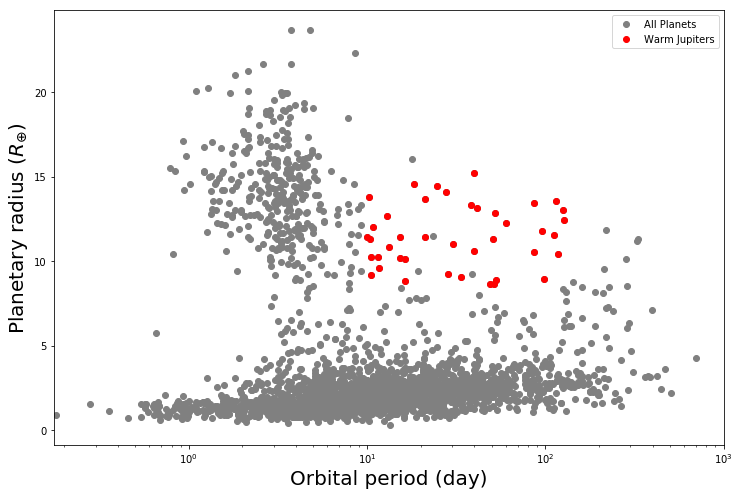

In [59]:

s = 2
fig = plt.figure(figsize=(6*s,4*s))
ax = plt.gca()
ax.scatter(periodAE,radiusAE,c='gray',label="All Planets")
ax.scatter(periodWJ,radiusWJ,c='red',label='Warm Jupiters')
ax.set_xscale('log')
ax.set_xlim(0,1000)
ax.set_xlabel('Orbital period (day)',fontsize=20)
ax.set_ylabel(r'Planetary radius ($R_{\oplus}$)',fontsize=20)
plt.legend()
savetag = 'RadiusVsPeriod'
savetype = '.png'
plt.savefig('plots/'+savetag+savetype,dpi=300,bbox_inches='tight')

/opt/aci/sw/python/3.6.3_anaconda-5.0.1/lib/python3.6/site-packages/matplotlib/axes/_base.py:2923: UserWarning: Attempted to set non-positive xlimits for log-scale axis; invalid limits will be ignored.
  'Attempted to set non-positive xlimits for log-scale axis; '


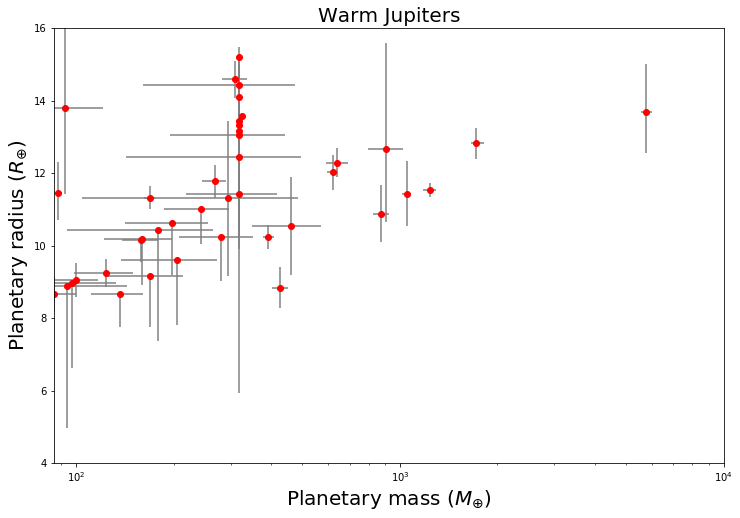

In [60]:
xerr = np.array([massErrLoWJ,massErrUpWJ])
yerr = np.array([radiusErrLoWJ,radiusErrUpWJ])
s = 2
fig = plt.figure(figsize=(6*s,4*s))
ax = plt.gca()
ax.errorbar(massWJ,radiusWJ,xerr=xerr,yerr=yerr,ecolor='gray',fmt='o',c='red',label='Warm, Large Exoplanets')
ax.set_xscale('log')
ax.set_xlim(0,1e4)
ax.set_xlabel(r'Planetary mass ($M_{\oplus}$)',fontsize=20)
ax.set_ylabel(r'Planetary radius ($R_{\oplus}$)',fontsize=20)
ax.set_ylim(4,16)
ax.set_title('Warm Jupiters',fontsize=20)
savetag = 'RadiusVsMass'
savetype = '.png'
plt.savefig('plots/'+savetag+savetype,dpi=300,bbox_inches='tight')

Text(0.5,0,'Eccentricity')

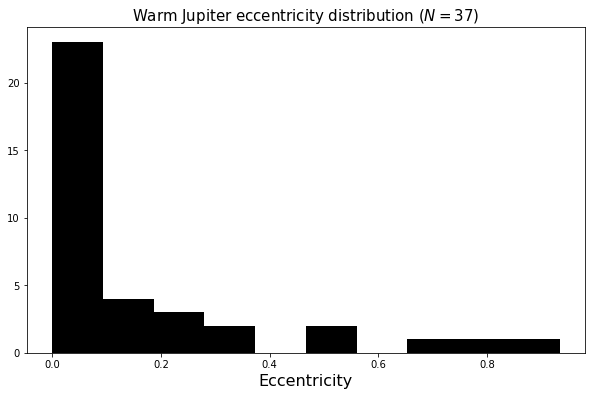

In [57]:
ecc = np.array(eccWJ[np.isfinite(eccWJ)])
plt.figure(figsize=(10,6))
plt.hist(ecc,bins=10,color='black')
plt.title(r'Warm Jupiter eccentricity distribution ($N=$'+str(len(ecc))+')',fontsize=15)
plt.xlabel('Eccentricity',fontsize=16)


## Questions

What is the mass-radius relation for planets?